In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config Inlinebackend.figure_format= 'retina'

## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [3]:
# Download dataset from https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/ (not included in the github repo)
prize_prediction_df = pd.read_csv("dataset/amz_uk_price_prediction_dataset.csv")

prize_prediction_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Data Review
I want to understand a bit better the data before move forward

#### Overal Analysis

In [4]:
# Undersanding the data
# Total number of rows and columns
data_shape = prize_prediction_df.shape
print(f"Our data has a total of {data_shape[0]} and {data_shape[1]} characteristics")

# Numeric vs Categorical Features
num = prize_prediction_df.select_dtypes(include="number")
cat = prize_prediction_df.select_dtypes(exclude="number")
print(f"\nOut data has {num.shape[1]} numerical features:\n", list(num.columns))
print(f"\nOut data has {cat.shape[1]} categorical features:\n", list(cat.columns))

Our data has a total of 2443651 and 9 characteristics

Out data has 5 numerical features:
 ['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth']

Out data has 4 categorical features:
 ['asin', 'title', 'isBestSeller', 'category']


In [5]:
# Check for missing data
print("\nHow many NULL values do we have in each feature?:")
print(prize_prediction_df.isna().sum())

print("\nHow many empty strings (" ") do we have in each feature?:")
print(prize_prediction_df.eq(" ").sum())

# Check for duplicates
print("\nHow many duplicates rows do we have in our data?:", print(prize_prediction_df.duplicated().sum()))


How many NULL values do we have in each feature?:
uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

How many empty strings () do we have in each feature?:
uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64
0

How many duplicates rows do we have in our data?: None


#### Categorical Values

In [6]:
# Categorical Values
print("How many unique values these columns have?")
for col in cat.columns:
    print(f"{col}: ", len(cat[col].unique()))

How many unique values these columns have?
asin:  2222742
title:  2077591
isBestSeller:  2
category:  296



Analyze isBestSeller Categorical value


,count,proportion
isBestSeller,,
False,2435671,1.0
True,7980,0.0


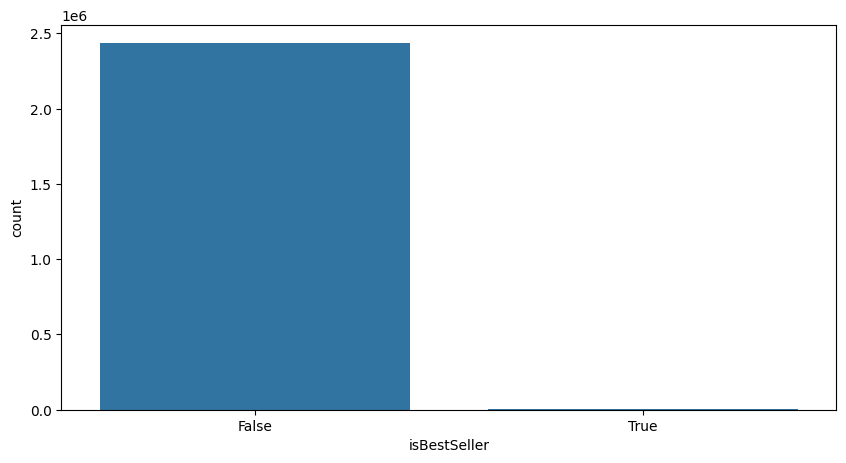

In [7]:
print("\nAnalyze isBestSeller Categorical value")
display(pd.concat([cat["isBestSeller"].value_counts(), cat["isBestSeller"].value_counts(normalize=True).round(2)], axis=1))

plt.figure(figsize=(10,5))
sns.countplot(x="isBestSeller", data=cat, legend=False);


Analyze category Categorical value


,count,proportion
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
...,...,...
Alexa Built-In Devices,107,0.00
Motorbike Chassis,107,0.00
Plugs,107,0.00


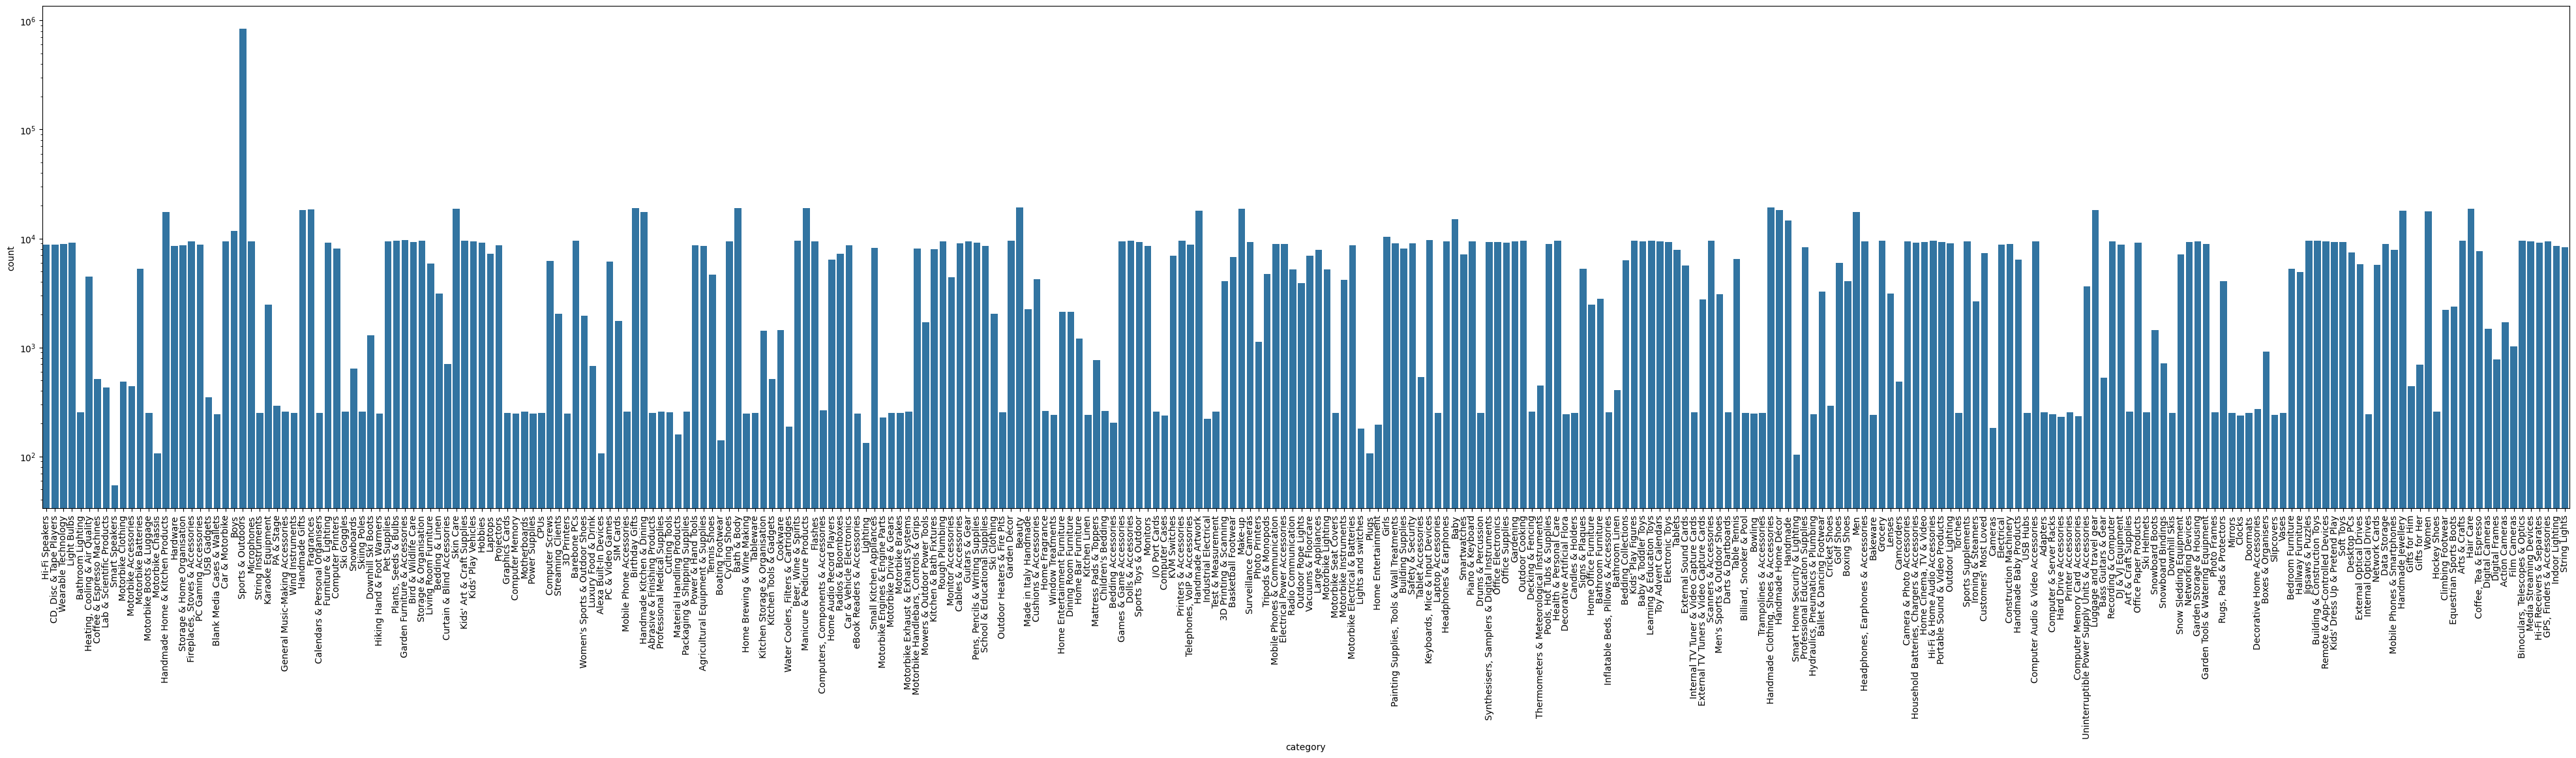

In [8]:

print("\nAnalyze category Categorical value")
display(pd.concat([cat["category"].value_counts(), cat["category"].value_counts(normalize=True).round(2)], axis=1))

plt.figure(figsize=(50,10))
plot = sns.countplot(x="category", data=cat, legend=False);
plot.set(yscale='log')
plot.tick_params(axis='x', rotation=90)

#### Numerical Values

In [9]:
# Numerical Values
display(num.describe())

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


[None]

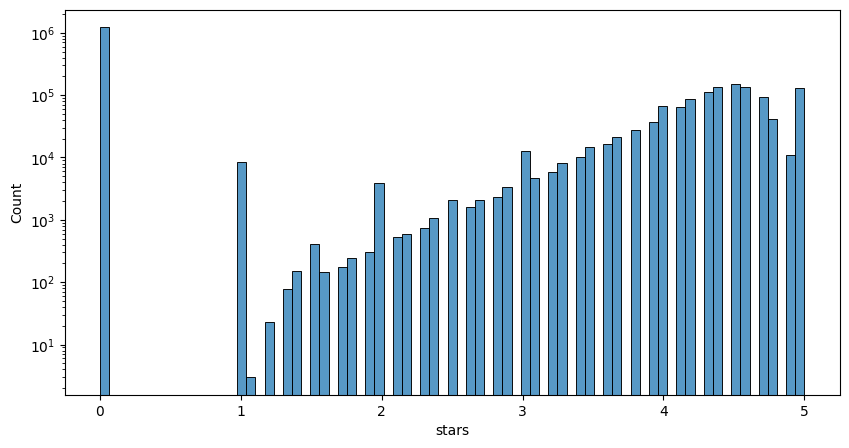

In [10]:
#histogram stars
plt.figure(figsize=(10,5))
plot = sns.histplot(num.stars, bins="auto")
plot.set(yscale='log')

[None]

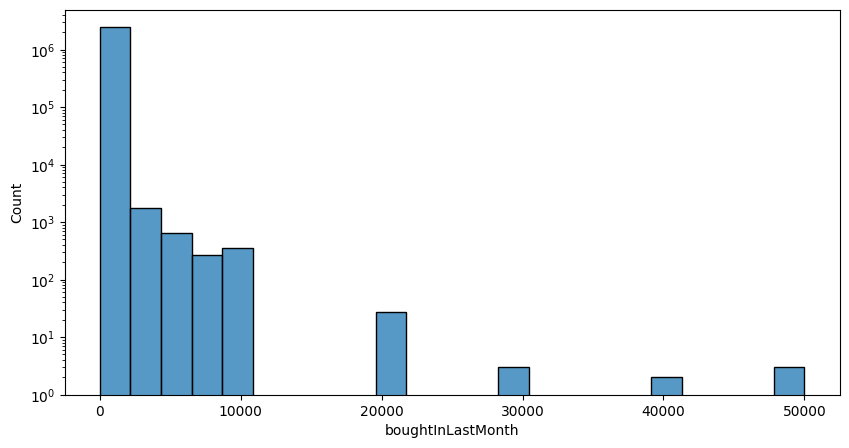

In [11]:
#histogram reviews
plt.figure(figsize=(10,5))
plot = sns.histplot(num.boughtInLastMonth, bins="auto")
plot.set(yscale='log')

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?


In [12]:
frequency_table = pd.concat([prize_prediction_df["category"].value_counts(), prize_prediction_df["category"].value_counts(normalize=True).round(2)], axis=1).sort_values("count", ascending=False)
print("The top 5 more listed categories are:")
display(frequency_table[:5])

The top 5 more listed categories are:


,count,proportion
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01



2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

[None]

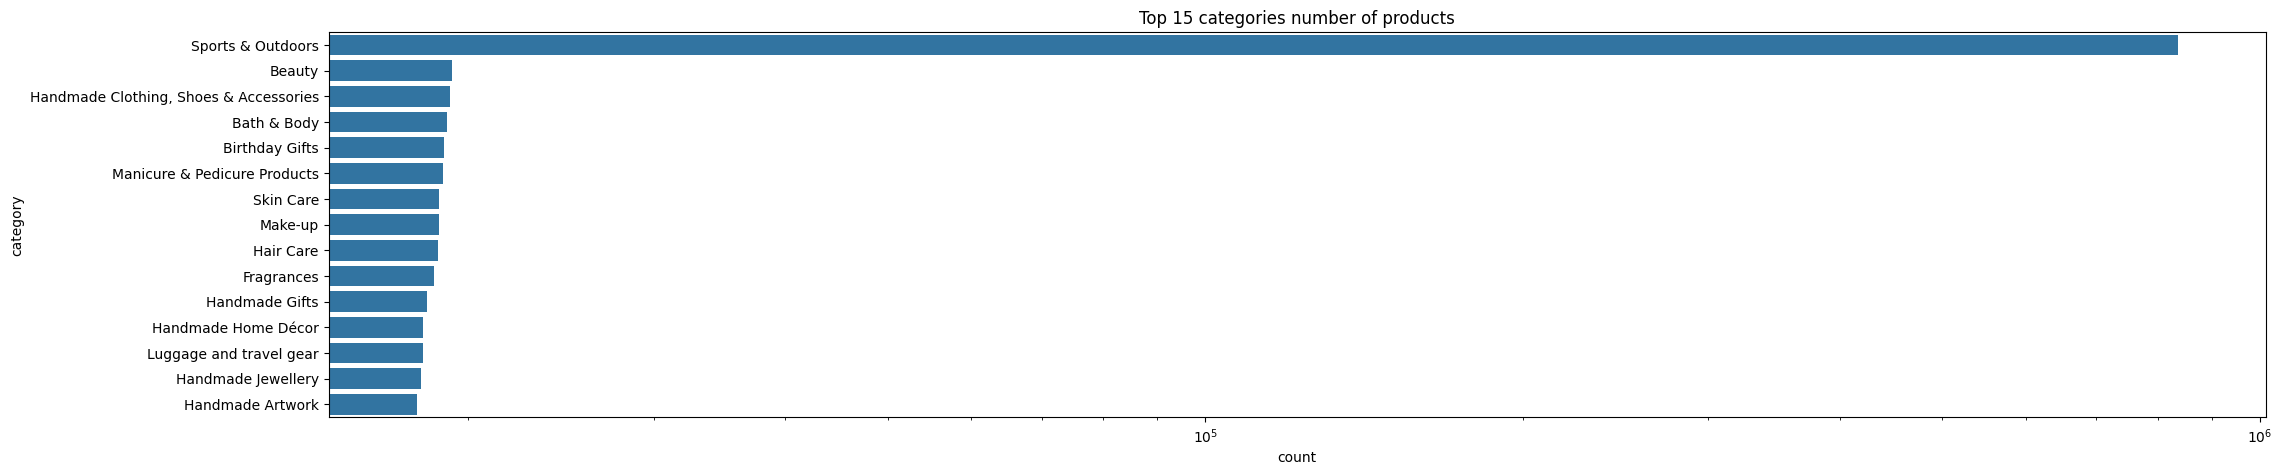

In [13]:
top_n = 15

plt.figure(figsize=(25,5))
plot = sns.barplot(x=frequency_table.iloc[:top_n]["count"], y=frequency_table.iloc[:top_n].index, legend=False);
plot.set_title(f'Top {top_n} categories number of products')
plot.set(xscale='log')

Text(0.5, 1.0, 'Top 15 categories products proportion')

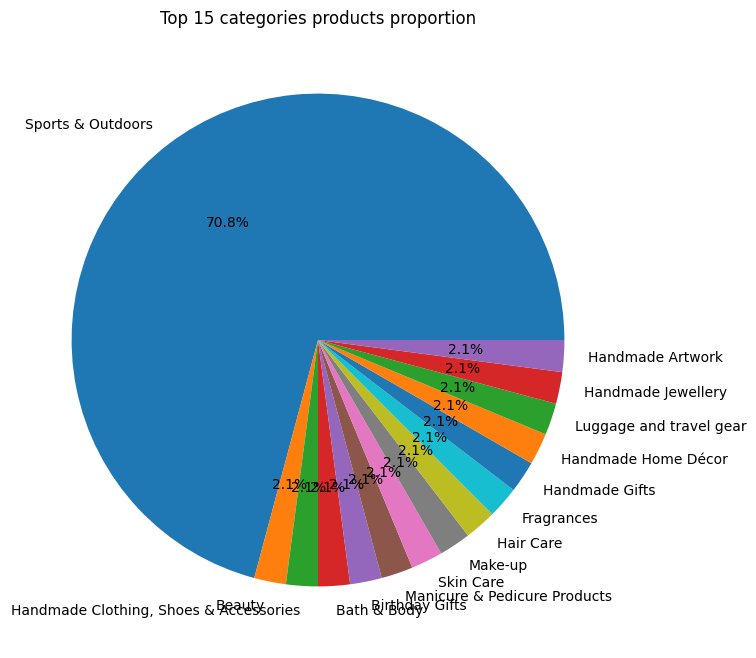

In [14]:
plt.figure(figsize=(8,8))
plt.pie(frequency_table.iloc[:top_n]["proportion"], labels=frequency_table.iloc[:top_n].index, autopct='%1.1f%%');
plt.title(f'Top {top_n} categories products proportion')

Sports & Outdoors is by far the category with more products

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [15]:
prize_prediction_df["price"].describe()
print("Statistic values for Price:")
print("Count:\t\t", prize_prediction_df["price"].count())
print("AVG:\t\t", prize_prediction_df["price"].mean())
print("Min:\t\t", prize_prediction_df["price"].min())
print("Max:\t\t", prize_prediction_df["price"].max())
print("Median:\t\t", prize_prediction_df["price"].median())
print("Mode:\t\t", list(prize_prediction_df["price"].mode()))

Statistic values for Price:
Count:		 2443651
AVG:		 89.24380943923663
Min:		 0.0
Max:		 100000.0
Median:		 19.09
Mode:		 [9.99]


The average price point of the products listed is £89.24.

The average price point is £76,25 more than the mode (£9.99)


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?


In [16]:
print("Dispersion statistic values for Price:")
print("Variance:\t", prize_prediction_df["price"].var())
print("STD:\t\t", prize_prediction_df["price"].std())
print("Quantile 25:\t", prize_prediction_df["price"].quantile(0.25))
print("Quantile 50:\t", prize_prediction_df["price"].quantile(0.5))
print("Quantile 75:\t", prize_prediction_df["price"].quantile(0.75))
print("Skewness:\t", prize_prediction_df["price"].skew())
print("Kurtosis:\t", prize_prediction_df["price"].kurt())

Dispersion statistic values for Price:
Variance:	 119445.48532254907
STD:		 345.60886175349884
Quantile 25:	 9.99
Quantile 50:	 19.09
Quantile 75:	 45.99
Skewness:	 27.492977566280338
Kurtosis:	 4241.616412866518


The data shows a high variance (119445.48), that means the data is highly spreaded from its mean.

The standard deviations (£345.60) also shows the data is spread out.

With the min, max and quantiles we can see 25% of the products cost £9.99 or less, 50% of the products cost £19.09 or less and 75% of the products costs £45.99 or less.

With the max we can see that the products from the percentil 75% until the end, have an increment of price form £45.99 to £100000

Finally the skewness (27.49) also confirms there is a long tail to the right of the distribution (skew > 0) and the hight kurtosis (4241.62) show there are heavy outlayers.

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

[None]

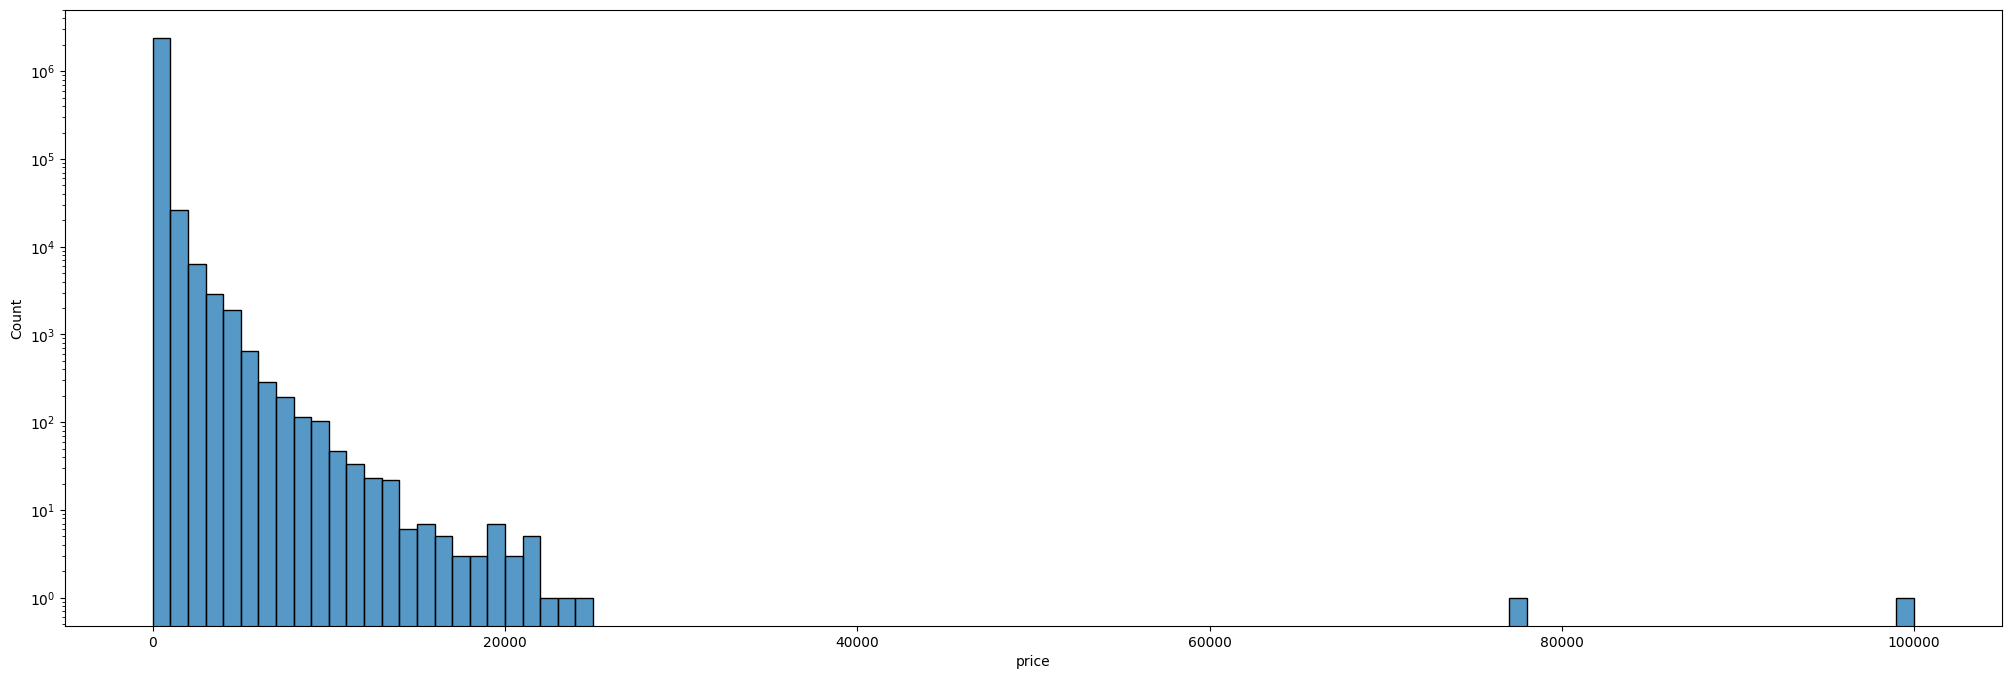

In [17]:
plt.figure(figsize=(25,8))
plot = sns.histplot(prize_prediction_df["price"], bins=100)
plot.set(yscale='log')

At the begginning it was hard to see given the long tail and the fact there are a big majority of items with price bellow £100.

Some of the actions to improve the visualization are:
- Adjust the bins: Instead of having one bin per price we "group" the values to improve the visualization (and the computation required for the creation of the chart)
- Make a wider chart: Given the long tail, give more space for the chart helps to read better the data
- Use a logaritmic scale in the y-axis: Given there are the 75% of the prices are in between £0 and £50 the first bins (specially bellow £10) will be very tall in comparision with the ones with higher prices. By providing a logaritmic scale we can visualize all the bars without having to dedicate much height to the chart.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [18]:
# Calculate the median and the mode
print("Statistic values for Rating:")
print("Median:\t\t", prize_prediction_df["stars"].median())
print("Mode:\t\t", list(prize_prediction_df["stars"].mode()))
print("Min:\t\t", prize_prediction_df["stars"].min())
print("Max:\t\t", prize_prediction_df["stars"].max())

# The previous values are 0. This could be because there are many articles without review and having 0 as default value
# Let's compare these two columns
products_without_reviews = prize_prediction_df.loc[(prize_prediction_df["stars"]==0) & (prize_prediction_df["reviews"]==0), "uid"].count()
total_products = prize_prediction_df.shape[0]
print(f"How many items have stars=0 and reviews=0: {products_without_reviews}/{total_products} ({products_without_reviews/total_products * 100:.2f}%)")
# We can confirm that 50.16% of the items has no reviews.

# To evaluate better the reviews given by the users we are going to exclude the products without reviews.
print("\nStatistic values for Rating (for product with reviews):")
print("Median:\t\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].median())
print("Mode:\t\t", list(prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 ,"stars"].mode())) 
print("Min:\t\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].min())
print("Max:\t\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].max())

Statistic values for Rating:
Median:		 0.0
Mode:		 [0.0]
Min:		 0.0
Max:		 5.0
How many items have stars=0 and reviews=0: 1225641/2443651 (50.16%)

Statistic values for Rating (for product with reviews):
Median:		 4.4
Mode:		 [4.5]
Min:		 1.0
Max:		 5.0


If we analyse the ratings (start) in overal the mean and mode is 0, but this is because 50.16% of the products where not reviewed.

By excluding products without review we can see that the median (the value in the middle) of the rates is 4.4 and the mode (the most comon review) is 4.5.

So we can see that the users trend to give high values to the products they rate (4.0 / 5.0).

By looking to the minimum and maximum values we see there are no rated items with values in between 0 and 1. This probably is because users can't rate with 0 the products.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [19]:
# After the previous analysis I am going to check these values directly removing the not rated products
print("\nDisperision statistic values for Rating (for product with reviews):")
print("Variance:\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].var())
print("STD:\t\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].std())
print("Quantile 25:\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].quantile(0.25))
print("Quantile 50:\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].quantile(0.5))
print("Quantile 75:\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].quantile(0.75))


Disperision statistic values for Rating (for product with reviews):
Variance:	 0.30834337523872835
STD:		 0.5552867504620729
Quantile 25:	 4.1
Quantile 50:	 4.4
Quantile 75:	 4.6


The variance and the standard deviation shows there is no much dispersion in the reviews.

The quantile 25 is already 4.1. That means that 25% of the rates are from 1 (min value) to 4.1.

From the quantile 25 to the 75 the values go from 4.1 to 4.6 (that represents the 50% of the values and in between that range)

And the last 25% of the values (from the quantile 75 to the max value) the rates go from 4.6 to 5.0

These quantiles confirm the distribution is small (Confirming the assumptions taken based in the median and the mode)

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [20]:
print("Skewness:\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].skew())
print("Kurtosis:\t", prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"].kurt())

Skewness:	 -2.3795681122127945
Kurtosis:	 9.78193769066435



Skew being negative show that the tail is on the left of the values.

On the other side Kurtosis (9.78) show there are long tails in the curve (kurtosis > 3)


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

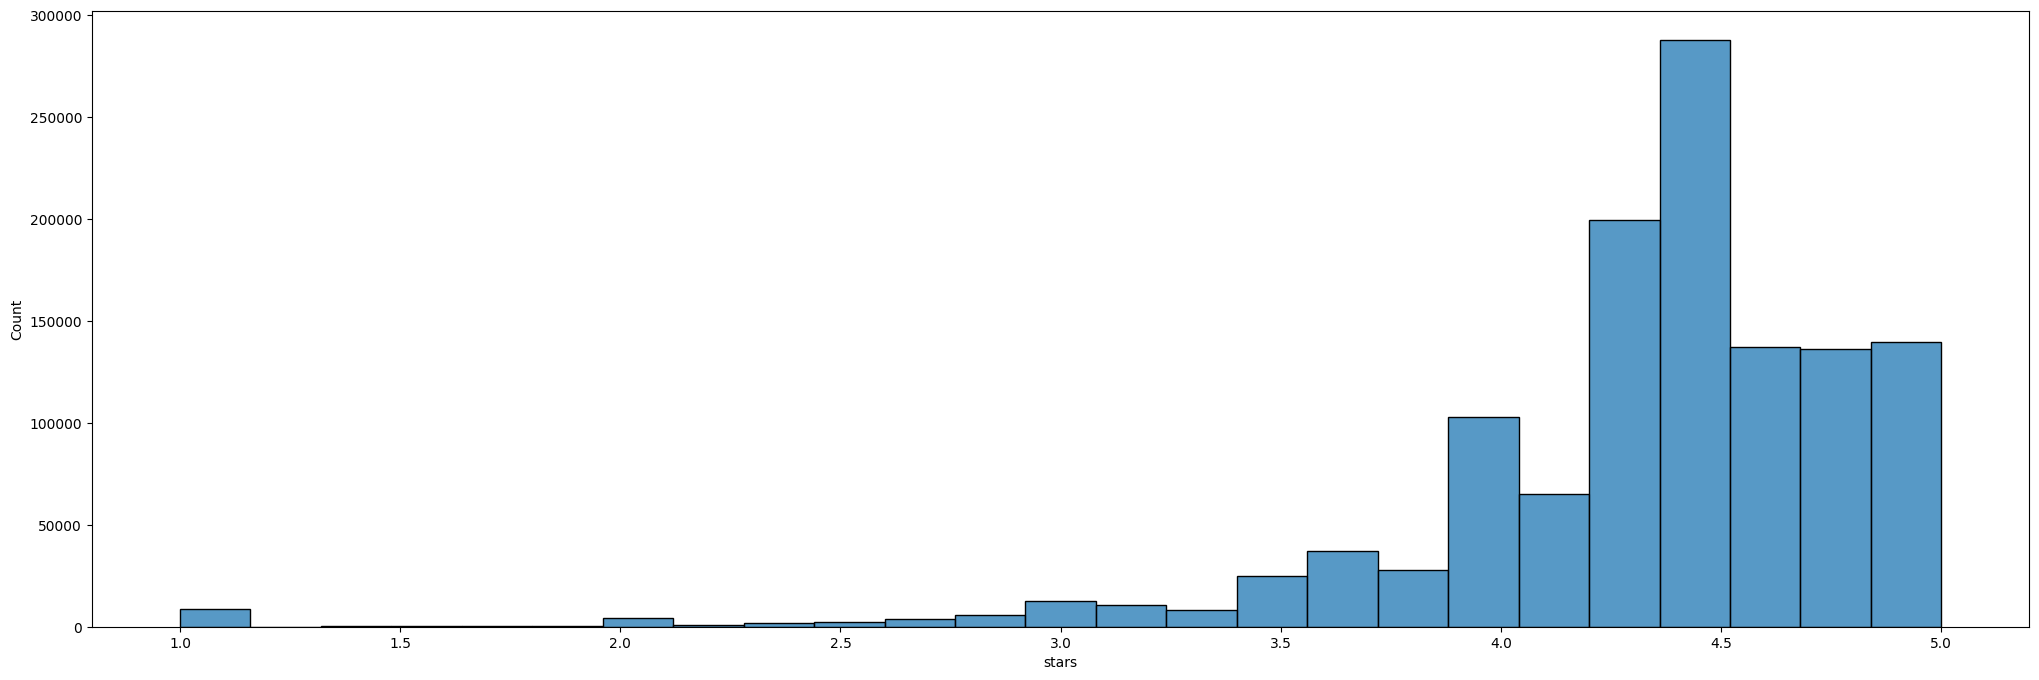

In [21]:
plt.figure(figsize=(25,8))
plot = sns.histplot(prize_prediction_df.loc[prize_prediction_df["reviews"] > 0 , "stars"], bins=25)


In the histogram we can confirm the assumptions, we can see a long tail on the right of the chart and majortity of the values around 4.5 (the most common rate)

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 